<a href="https://colab.research.google.com/github/plenoi/Clinic/blob/master/Clinical_Analysis_pmmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

# Read all data and set hn as index

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,pchemo,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,0.0,5.0,3.0,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,0.0,5.0,1.0,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,0.0,5.0,4.0,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,0.0,3.0,3.0,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,0.0,0.0,1.0,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Data Preprocessing

Check number of data

In [3]:
df.shape

(1723, 23)

Check any missing data in each column

In [4]:
df.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

Delete column with missing data

In [5]:
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)
df_clean_column.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
stage          24
pchemo          1
finalhisto     10
size          114
utmet          98
vgmet          97
pmmet          94
dtype: int64

Delete row with at least 1 missing data

In [0]:
df_clean = df_clean_column.dropna(axis = 0)

Total Clean Data

In [7]:
df_clean.shape

(1555, 15)

Check number of sample in pelvicme class 

In [8]:
pel_class = np.unique(df_clean['pmmet'])
pel_class

array([0., 1.])

In [9]:
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value

[1278, 277]

Separate pelviceme dataset into data (X) and label (y)

In [0]:
y = df_clean['pmmet'].values
X = df_clean.drop(['pmmet'],axis = 1).values

Randomly choose 200 samples of class 1 (positive) as training data and the rest as test data

In [11]:
import random
random.seed(1)
positive_index = np.where(y==1)[0]
negative_index = np.where(y==0)[0]
pos_train_index = random.sample(list(positive_index),200)
pos_test_index = list(set(positive_index) - set(pos_train_index))

print("All dataset: "+str(len(positive_index))+" "+str(len(negative_index)))
print("Positive test dataset: "+str(len(pos_test_index)))

All dataset: 277 1278
Positive test dataset: 77


Randomly separate negative dataset into 5 parts to create 5 training datasets consisted of 200 samples

In [12]:
neg_train_index1 = random.sample(list(negative_index),200)
neg_tmp_index = list(set(negative_index) - set(neg_train_index1))

neg_train_index2 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index2))

neg_train_index3 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index3))

neg_train_index4 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index4))

neg_train_index5 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index5))

neg_train_index6 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index6))

neg_test_index = neg_tmp_index
print("Negative test dataset: "+str(len(neg_test_index)))

Negative test dataset: 78


Create 5 training dataset and 1 test dataset

In [13]:
X_train1 = np.concatenate((X[neg_train_index1,:],X[pos_train_index,:]),axis=0)
y_train1 = np.concatenate((y[neg_train_index1],y[pos_train_index]),axis=0)

X_train2 = np.concatenate((X[neg_train_index2,:],X[pos_train_index,:]),axis=0)
y_train2 = np.concatenate((y[neg_train_index2],y[pos_train_index]),axis=0)

X_train3 = np.concatenate((X[neg_train_index3,:],X[pos_train_index,:]),axis=0)
y_train3 = np.concatenate((y[neg_train_index3],y[pos_train_index]),axis=0)

X_train4 = np.concatenate((X[neg_train_index4,:],X[pos_train_index,:]),axis=0)
y_train4 = np.concatenate((y[neg_train_index4],y[pos_train_index]),axis=0)

X_train5 = np.concatenate((X[neg_train_index5,:],X[pos_train_index,:]),axis=0)
y_train5 = np.concatenate((y[neg_train_index5],y[pos_train_index]),axis=0)

X_train6 = np.concatenate((X[neg_train_index6,:],X[pos_train_index,:]),axis=0)
y_train6 = np.concatenate((y[neg_train_index6],y[pos_train_index]),axis=0)

X_train6.shape, y_train6.shape

((400, 14), (400,))

In [14]:
X_test = np.concatenate((X[neg_test_index,:],X[pos_test_index,:]),axis=0)
y_test = np.concatenate((y[neg_test_index],y[pos_test_index]),axis=0)
X_test.shape, y_test.shape

((155, 14), (155,))

Data normalization to range of (0 to 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
alltrain = np.concatenate((X_train1,X_train2,X_train3,X_train4,X_train5,X_train6),axis=0)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(alltrain)
X_train_norm1 = scaler.transform(X_train1)
X_train_norm2 = scaler.transform(X_train2)
X_train_norm3 = scaler.transform(X_train3)
X_train_norm4 = scaler.transform(X_train4)
X_train_norm5 = scaler.transform(X_train5)
X_train_norm6 = scaler.transform(X_train6)
X_test_norm = scaler.transform(X_test)

# Load Blind Test

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/Blind.csv')
df = df.set_index('hn')
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)
df_clean = df_clean_column.dropna(axis = 0)
y_blind = df_clean['pmmet'].values
X_blind = df_clean.drop(['pmmet'],axis = 1).values

pel_class = np.unique(df_clean['pmmet'])
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value


[96, 43]

Data normalization using same scale

In [0]:
X_blind_norm = scaler.transform(X_blind)

# Logistic Regression 

10-Folds Cross Validation Training Accuracy with Tuning

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 4, 8, 16]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm2, y_train2)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 16}
10CV accuracy : 73.25


Test Accuracy

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 71.61290322580646


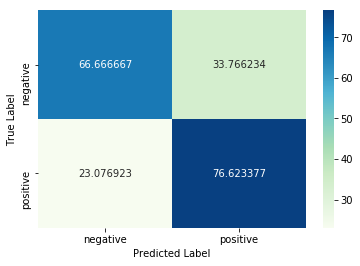

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

The precision is the ratio tp / (tp + fp). The precision is the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn). The recall is the ability of the classifier to find all the positive samples.

The F score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_true.

In [43]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.74      0.67      0.70        78
    positive       0.69      0.77      0.73        77

    accuracy                           0.72       155
   macro avg       0.72      0.72      0.72       155
weighted avg       0.72      0.72      0.72       155



In [26]:
y_predict = clf.predict(X_blind_norm)
print("Test accuracy : "+str(sum(y_blind == y_predict)/len(y_blind)*100))

Test accuracy : 69.7841726618705


# Interpret Logistics Regression

In [0]:
def evalBinaryClassifier(model, x, y, labels=['Positives','Negatives']):
    '''
    Visualize the performance of  a Logistic Regression Binary Classifier.
    
    Displays a labelled Confusion Matrix, distributions of the predicted
    probabilities for both classes, the ROC curve, and F1 score of a fitted
    Binary Logistic Classifier. Author: gregcondit.com/articles/logr-charts
    
    Parameters
    ----------
    model : fitted scikit-learn model with predict_proba & predict methods
        and classes_ attribute. Typically LogisticRegression or 
        LogisticRegressionCV
    
    x : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples
        in the data to be tested, and n_features is the number of features
    
    y : array-like, shape (n_samples,)
        Target vector relative to x.
    
    labels: list, optional
        list of text labels for the two classes, with the positive label first
        
    Displays
    ----------
    3 Subplots
    
    Returns
    ----------
    F1: float
    '''
    #model predicts probabilities of positive class
    p = model.predict_proba(x)
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        pos_p = p[:,1]
    elif model.classes_[0] == 1:
        pos_p = p[:,0]
    
    #FIGURE
    plt.figure(figsize=[15,4])
    
    #1 -- Confusion matrix
    y_p =  model.predict(x)
    cm = confusion_matrix(y, y_p)
    cm = cm / cm.astype(np.float).sum(axis=1)*100
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)
      
    #2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos':pos_p, 'target': y})
    plt.subplot(132)
    plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0,1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")
    
    #3 -- ROC curve with annotated decision point
    fp_rates, tp_rates, _ = roc_curve(y,p[:,1])
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(133)
    plt.plot(fp_rates, tp_rates, color='green',
             lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
    #plot current decision point:
    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()
    #Print and Return the F1 score
    tn, fp, fn, tp = [i for i in cm.ravel()]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2*(precision * recall) / (precision + recall)
    printout = (
        f'Precision: {round(precision,2)} | '
        f'Recall: {round(recall,2)} | '
        f'F1 Score: {round(F1,2)} | '
    )
    print(printout)
    return 'Accuracy: '+str(sum(y == y_p)/len(y)*100)

Create our final model

In [76]:
clf = LogisticRegression(random_state=0, solver='liblinear', C=16)
clf.fit(X_train_norm2, y_train2)

LogisticRegression(C=16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Distribution of Predicted Probabilities of both classes in validation data

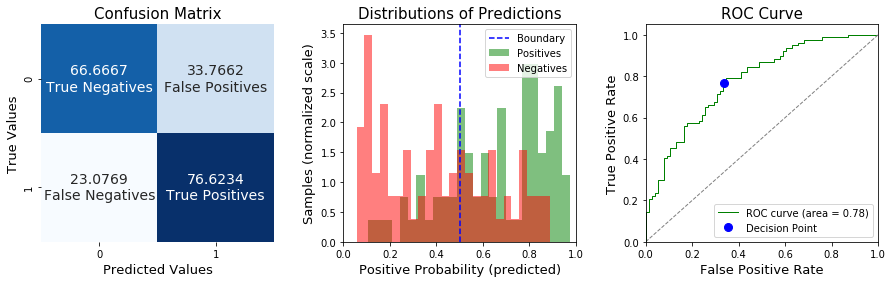

Precision: 0.69 | Recall: 0.77 | F1 Score: 0.73 | 


'accuracy: 71.61290322580646'

In [77]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
evalBinaryClassifier(clf, X_test_norm, y_test)

Get intercept and coefficient

In [78]:
print('intercept : ', clf.intercept_)
print('coefficient : ', clf.coef_)
print('odd-ratio :', np.exp(clf.coef_))

intercept :  [-3.3564898]
coefficient :  [[ 1.05594687 -0.79271848  2.02130949  0.55513268  0.36294024 -0.023241
   0.22402443  0.23507289  1.32507846  0.22091543 -0.19670057  4.37803156
   1.90120674  0.81898861]]
odd-ratio : [[ 2.87469584  0.4526127   7.54820274  1.74217212  1.43754996  0.97702699
   1.25110158  1.26500097  3.76248054  1.24721795  0.82143656 79.68103161
   6.69396746  2.26820463]]


In [64]:
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm 

mod = sm.Logit(y_train2, X_train_norm2)
res = mod.fit()
print(res.summary())

         Current function value: 0.556849
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                           13
Date:                Thu, 19 Sep 2019   Pseudo R-squ.:                  0.1966
Time:                        07:06:31   Log-Likelihood:                -222.74
converged:                      False   LL-Null:                       -277.26
Covariance Type:            nonrobust   LLR p-value:                 2.881e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.3371      0.994     -2.352      0.019      -4.285      -0.390
x2            -1.5009      1.109     -1.353      0.176      -3.67

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [66]:
df_clean.columns

Index(['age', 'parity', 'hiv', 'menopaus', 'disease', 'surgery', 'conization',
       'OPDsize', 'stage', 'pchemo', 'finalhisto', 'size', 'utmet', 'vgmet',
       'pmmet'],
      dtype='object')

In [0]:
# Logistics Regression
#clf = LogisticRegression(fit_intercept = False, C = 1e9)
#clf.fit(X_train_norm2, y_train2)

# Logistic Regression with Validation Dataset

In [0]:
result = list()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, PredefinedSplit
params = {'C': [1, 2, 4, 8, 16]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10 , scoring = 'accuracy')
clf.fit(X_train_norm1, y_train1)
train_acc = clf.best_score_*100
print("Best params : " + str(clf.best_params_))
print("Training accuracy : "+str(train_acc))

Best params : {'C': 1}
Training accuracy : 71.25


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
y_predict = clf.predict(X_test_norm)
test_acc = sum(y_test == y_predict)/len(y_test)*100
print("Test accuracy : "+str(test_acc))

Test accuracy : 71.61290322580646


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_blind_norm)
blind_acc = sum(y_blind == y_predict)/len(y_blind)*100
print("Blind accuracy : "+str(blind_acc))

Blind accuracy : 64.74820143884892


In [0]:
result.append([train_acc, test_acc, blind_acc])

In [0]:
result

[[77.25, 69.6774193548387, 66.18705035971223],
 [71.0, 70.3225806451613, 69.06474820143885],
 [69.75, 70.96774193548387, 68.34532374100719]]

#SGD Classifier
10-Folds Cross Validation Training Accuracy with Tuning

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'loss' : ['hinge', 'log','modified_huber','squared_hinge', 'perceptron'],
    'penalty' : ['l2', 'l1', 'none', 'elasticnet'],
    'alpha' : [0.0001, 0.001, 0.01, 0.1],
    'eta0' : [0.001, 0.01, 0.1],
    'l1_ratio' : [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8, 0.9]
}
clf = GridSearchCV(SGDClassifier(random_state=0,max_iter=1000,learning_rate='constant', eta0 = 0.0001),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_))

Best params : {'alpha': 0.0001, 'eta0': 0.1, 'l1_ratio': 0.8, 'loss': 'hinge', 'penalty': 'elasticnet'}
10CV accuracy : 0.74


Test Accuracy

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 72.90322580645162


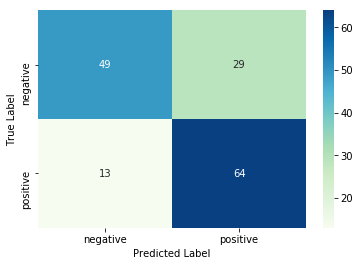

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
#C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="d",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

The precision is the ratio tp / (tp + fp). The precision is the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn). The recall is the ability of the classifier to find all the positive samples.

The F score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_true.

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.79      0.63      0.70        78
    positive       0.69      0.83      0.75        77

    accuracy                           0.73       155
   macro avg       0.74      0.73      0.73       155
weighted avg       0.74      0.73      0.73       155



# Support Vector Machine

10-Folds Cross Validation Training Accuracy

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1,2,4,8,16,32], # High C = Overfitting
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32] # High gamma = Overfitting
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 16, 'gamma': 0.125}
10CV accuracy : 74.25


Test Accuracy

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.7225806451612903

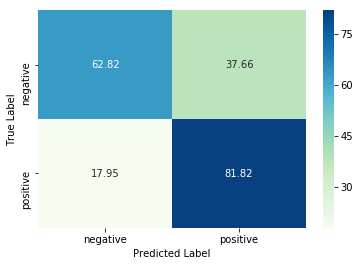

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.78      0.63      0.70        78
    positive       0.68      0.82      0.75        77

    accuracy                           0.72       155
   macro avg       0.73      0.72      0.72       155
weighted avg       0.73      0.72      0.72       155



# Random Forest

10-Folds Cross Validation Training Accuracy

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200,500],
    'min_samples_leaf' : [1,2,4,8,16,32],
    'max_features' : ['sqrt',0.5,0.8],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 100}
10CV accuracy : 75.0


Test Accuracy

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.7096774193548387

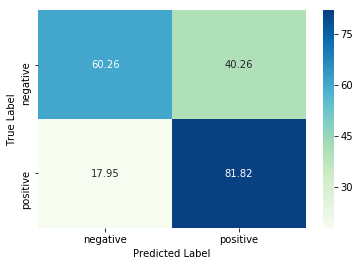

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.77      0.60      0.68        78
    positive       0.67      0.82      0.74        77

    accuracy                           0.71       155
   macro avg       0.72      0.71      0.71       155
weighted avg       0.72      0.71      0.71       155



# XGBoost

10-Folds Cross Validation Training Accuracy

In [0]:
#!pip install xgboost  // If you dont have XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200],
    'max_depth' : [2, 4, 8],
     'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32], # High gamma as much as possible
    'learning_rate' : [0.001, 0.01, 0.1],
    'minchildweight' : [1,2,4,8,16,32],  # High as much as possible
    'subsample' : [0.5,0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]
    #'reg_alpha','reg_lamnda' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]  # Only for linear
    
}
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic',n_jobs=-1),params, cv = 10)
clf.fit(X_train_norm1, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'minchildweight': 1, 'n_estimators': 100, 'subsample': 0.8}
10CV accuracy : 76.75


Test Accuracy

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict1 = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict1)/len(y_test)

0.7161290322580646

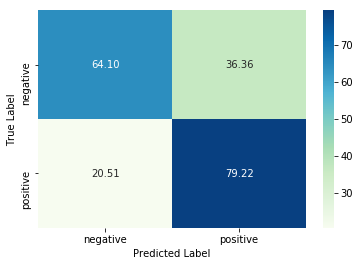

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict1) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict1, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.76      0.64      0.69        78
    positive       0.69      0.79      0.73        77

    accuracy                           0.72       155
   macro avg       0.72      0.72      0.71       155
weighted avg       0.72      0.72      0.71       155



# XGBoost Model 2

In [0]:
#!pip install xgboost  // If you dont have XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200],
    'max_depth' : [2, 4, 8],
     'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32], # High gamma as much as possible
    'learning_rate' : [0.001, 0.01, 0.1],
    'minchildweight' : [1,2,4,8,16,32],  # High as much as possible
    'subsample' : [0.5,0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]
    #'reg_alpha','reg_lamnda' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]  # Only for linear
    
}
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic'),params, cv = 10)
clf.fit(X_train_norm2, y_train2)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))


Best params : {'colsample_bytree': 0.5, 'gamma': 0.0625, 'learning_rate': 0.1, 'max_depth': 8, 'minchildweight': 1, 'n_estimators': 50, 'subsample': 0.5}
10CV accuracy : 75.75


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict2 = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict2)/len(y_test)

0.7032258064516129

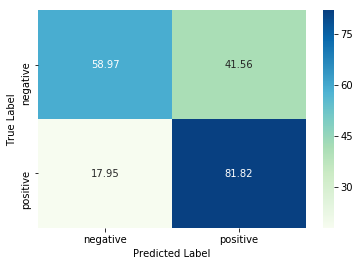

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict2) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Deep Learning

Install Tensorflow 2.0, if you dont have it, pls uncomment

In [0]:
#!pip install tensorflow==2.0.0-beta1
import tensorflow as tf

Create Deep Learning Model 
Using Sequential = Feed-Forward Model
1. The first hidden layer contains 16 hidden nodes connected to input layers with 18 nodes corresponding to number of features
2. Other layers is chosen based on 2^1, 2^2, 2^3 concept with 'relu' activation function
3. Output layer is sigmoid because it can output value which is close 0 and 1 (Binary Class)

In [80]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(14,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


Set up Optimizer to 'adam' with is argubly the best one now, the loss function is set to binary_crossentropy (Binary Classification)

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train model around 20 epochs with batchsize 20


In [0]:
model.fit(X_train_norm, y_train, epochs=3, batch_size=20)

Epoch 1/3
400/400 [==============================] - 0s 74us/sample - loss: 0.6211 - acc: 0.7150
Epoch 2/3
400/400 [==============================] - 0s 66us/sample - loss: 0.6179 - acc: 0.7150
Epoch 3/3
400/400 [==============================] - 0s 66us/sample - loss: 0.6118 - acc: 0.7300


The model train accuracy is stable aroud 75, so stop train the model

Test Accuracy

In [0]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.6709677419354839

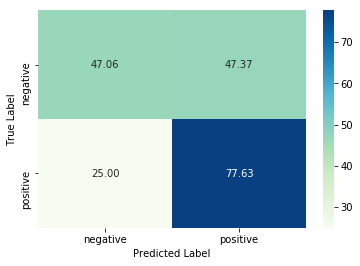

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.65      0.47      0.55        68
    positive       0.62      0.78      0.69        76

    accuracy                           0.63       144
   macro avg       0.64      0.62      0.62       144
weighted avg       0.64      0.63      0.62       144



#Deep Learning with Early Stop to Prevent Overfitting

Split validation data from training data and also create new training data

In [0]:
from sklearn.model_selection import train_test_split
X_train_over, X_val_norm, y_train_over, y_val = train_test_split(X_train_norm, y_train, test_size=0.20, random_state=1)

Create model again

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(18,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                304       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


Create optimizer again

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Create early stop function to prevent overfitting
if the accuracy of validation data does not increase for 5 epoch (patience = 5), use the latest best validation accuracy model

In [0]:
overfit_prevent = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


Train model with early stop

In [0]:
model.fit(X_train_over, y_train_over, epochs= 100, batch_size = 20, validation_data= (X_val_norm, y_val), callbacks=[overfit_prevent])

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 0s 555us/sample - loss: 0.7039 - acc: 0.4656 - val_loss: 0.6961 - val_acc: 0.4875
Epoch 2/100
320/320 [==============================] - 0s 86us/sample - loss: 0.6940 - acc: 0.4906 - val_loss: 0.6935 - val_acc: 0.4875
Epoch 3/100
320/320 [==============================] - 0s 81us/sample - loss: 0.6890 - acc: 0.5562 - val_loss: 0.6911 - val_acc: 0.4875
Epoch 4/100
320/320 [==============================] - 0s 85us/sample - loss: 0.6853 - acc: 0.6094 - val_loss: 0.6867 - val_acc: 0.5375
Epoch 5/100
320/320 [==============================] - 0s 101us/sample - loss: 0.6798 - acc: 0.6156 - val_loss: 0.6807 - val_acc: 0.5375
Epoch 6/100
320/320 [==============================] - 0s 96us/sample - loss: 0.6737 - acc: 0.6219 - val_loss: 0.6712 - val_acc: 0.5625
Epoch 7/100
320/320 [==============================] - 0s 98us/sample - loss: 0.6669 - acc: 0.6594 - val_loss: 0.6630 - val_acc: 0.5875
E

In [0]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.7152777777777778

# Deep Learning with validation

In [81]:
tf.reset_default_graph()
np.random.seed(1)
tf.random.set_random_seed(1)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='relu', input_shape=(14,)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [83]:
train_acc = list()
val_acc = list()
for i in range(0,125):
  history = model.fit(X_train_norm1, y_train1, epochs= 1, batch_size = 200, validation_data= (X_test_norm, y_test))
  tmp_avg = np.mean(history.history['acc'])
  tmp_avg_val = np.mean(history.history['val_acc'])
  
  history = model.fit(X_train_norm2, y_train2, epochs= 1, batch_size = 200, validation_data= (X_test_norm, y_test))
  tmp_avg = tmp_avg + np.mean(history.history['acc'])
  tmp_avg_val = tmp_avg_val + np.mean(history.history['val_acc'])
  
  history = model.fit(X_train_norm3, y_train3, epochs= 1, batch_size = 200, validation_data= (X_test_norm, y_test))
  tmp_avg = tmp_avg + np.mean(history.history['acc'])
  tmp_avg_val = tmp_avg_val + np.mean(history.history['val_acc'])
  
  history = model.fit(X_train_norm4, y_train4, epochs= 1, batch_size = 200, validation_data= (X_test_norm, y_test))
  tmp_avg = tmp_avg + np.mean(history.history['acc'])
  tmp_avg_val = tmp_avg_val + np.mean(history.history['val_acc'])
  
  history = model.fit(X_train_norm5, y_train5, epochs= 1, batch_size = 200, validation_data= (X_test_norm, y_test))
  tmp_avg = tmp_avg + np.mean(history.history['acc'])
  tmp_avg_val = tmp_avg_val + np.mean(history.history['val_acc'])
  
  history = model.fit(X_train_norm6, y_train6, epochs= 1, batch_size = 200, validation_data= (X_test_norm, y_test))
  tmp_avg = tmp_avg + np.mean(history.history['acc'])
  tmp_avg_val = tmp_avg_val + np.mean(history.history['val_acc'])
  
  train_acc.append(tmp_avg/6)
  val_acc.append(tmp_avg_val/6)

Train on 400 samples, validate on 155 samples
400/400 [==============================] - 0s 1ms/sample - loss: 0.6913 - acc: 0.4925 - val_loss: 0.6912 - val_acc: 0.4968
Train on 400 samples, validate on 155 samples
400/400 [==============================] - 0s 36us/sample - loss: 0.6913 - acc: 0.4875 - val_loss: 0.6911 - val_acc: 0.4839
Train on 400 samples, validate on 155 samples
400/400 [==============================] - 0s 35us/sample - loss: 0.6917 - acc: 0.4775 - val_loss: 0.6909 - val_acc: 0.4774
Train on 400 samples, validate on 155 samples
400/400 [==============================] - 0s 36us/sample - loss: 0.6914 - acc: 0.4850 - val_loss: 0.6908 - val_acc: 0.4710
Train on 400 samples, validate on 155 samples
400/400 [==============================] - 0s 31us/sample - loss: 0.6917 - acc: 0.5025 - val_loss: 0.6906 - val_acc: 0.4839
Train on 400 samples, validate on 155 samples
400/400 [==============================] - 0s 33us/sample - loss: 0.6907 - acc: 0.5125 - val_loss: 0.6904

# Model History

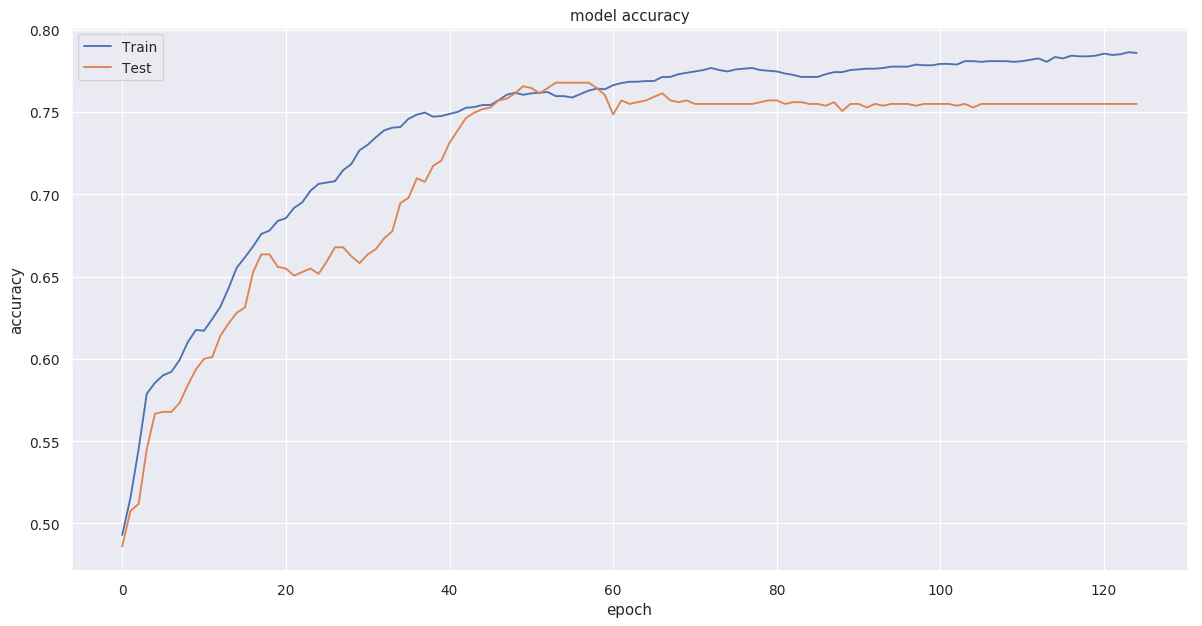

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [85]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.7548387096774194

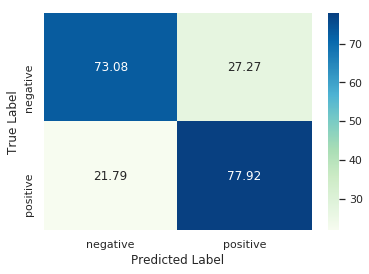

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

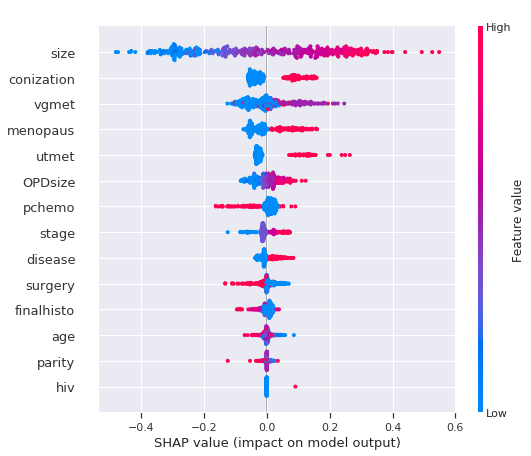

In [112]:
#!pip install shap
import shap

#initialize js methods for visualization
shap.initjs()

explainer = shap.DeepExplainer(model,X_train_norm2)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_train_norm2)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[0], X_train_norm2, feature_names = df_clean.columns[0:-1])

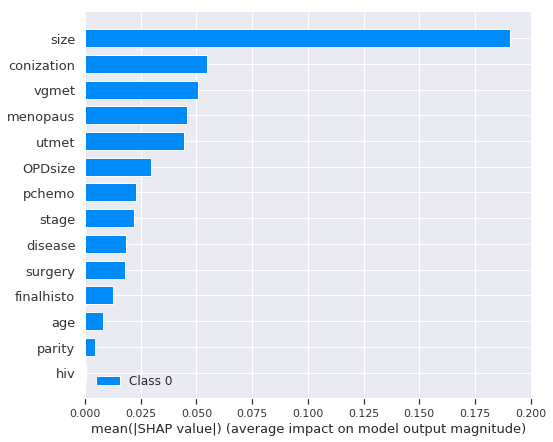

In [106]:
shap.summary_plot(shap_values[0], X_train_norm2, feature_names=df_clean.columns[0:-1])

In [107]:
y_predict = np.round(model.predict(X_blind_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_blind)/len(y_blind)

0.7122302158273381

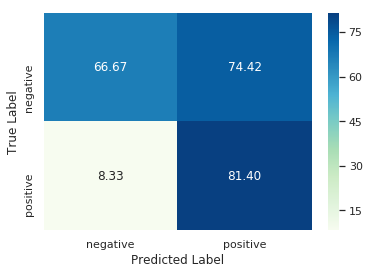

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_blind,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
train_acc[124]

0.7858333587646484

# Deep Learning for imbalanced problem

In [0]:
import tensorflow as tf
model_ibp = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(18,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model_ibp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model_ibp.fit(X_train_norm, y_train, epochs=4)

Epoch 1/4
400/400 [==============================] - 0s 354us/sample - loss: 0.6932 - acc: 0.4625
Epoch 2/4
400/400 [==============================] - 0s 48us/sample - loss: 0.6923 - acc: 0.5075
Epoch 3/4
400/400 [==============================] - 0s 42us/sample - loss: 0.6914 - acc: 0.5000
Epoch 4/4
400/400 [==============================] - 0s 41us/sample - loss: 0.6873 - acc: 0.5475


In [0]:
model_ibp.fit(X_train_norm2, y_train2, epochs=4)

Epoch 1/4
400/400 [==============================] - 0s 61us/sample - loss: 0.6802 - acc: 0.5625
Epoch 2/4
400/400 [==============================] - 0s 42us/sample - loss: 0.6698 - acc: 0.6150
Epoch 3/4
400/400 [==============================] - 0s 50us/sample - loss: 0.6608 - acc: 0.6225
Epoch 4/4
400/400 [==============================] - 0s 49us/sample - loss: 0.6514 - acc: 0.6500


In [0]:
model_ibp.fit(X_train_norm3, y_train3, epochs=4)

Epoch 1/4
400/400 [==============================] - 0s 54us/sample - loss: 0.6376 - acc: 0.6825
Epoch 2/4
400/400 [==============================] - 0s 48us/sample - loss: 0.6269 - acc: 0.6825
Epoch 3/4
400/400 [==============================] - 0s 43us/sample - loss: 0.6171 - acc: 0.7250
Epoch 4/4
400/400 [==============================] - 0s 50us/sample - loss: 0.6090 - acc: 0.7300


In [0]:
model_ibp.fit(X_train_norm4, y_train4, epochs=4)

Epoch 1/4
400/400 [==============================] - 0s 73us/sample - loss: 0.6120 - acc: 0.7325
Epoch 2/4
400/400 [==============================] - 0s 48us/sample - loss: 0.6069 - acc: 0.7525
Epoch 3/4
400/400 [==============================] - 0s 47us/sample - loss: 0.6024 - acc: 0.7375
Epoch 4/4
400/400 [==============================] - 0s 45us/sample - loss: 0.5987 - acc: 0.7350


In [0]:
model_ibp.fit(X_train_norm5, y_train5, epochs=4)

Epoch 1/4
400/400 [==============================] - 0s 55us/sample - loss: 0.6070 - acc: 0.7150
Epoch 2/4
400/400 [==============================] - 0s 52us/sample - loss: 0.6035 - acc: 0.7500
Epoch 3/4
400/400 [==============================] - 0s 45us/sample - loss: 0.5960 - acc: 0.7525
Epoch 4/4
400/400 [==============================] - 0s 52us/sample - loss: 0.5922 - acc: 0.7475


In [0]:
model_ibp.fit(X_train_norm6, y_train6, epochs=4)

Epoch 1/4
400/400 [==============================] - 0s 61us/sample - loss: 0.5765 - acc: 0.7525
Epoch 2/4
400/400 [==============================] - 0s 48us/sample - loss: 0.5708 - acc: 0.7550
Epoch 3/4
400/400 [==============================] - 0s 48us/sample - loss: 0.5670 - acc: 0.7600
Epoch 4/4
400/400 [==============================] - 0s 50us/sample - loss: 0.5599 - acc: 0.7700


In [0]:
y_predict = np.round(model_ibp.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.6527777777777778

# Save Data to SVM format for Optimization

In [0]:
#from sklearn.datasets import dump_svmlight_file
#dump_svmlight_file(X_train_norm, y_train, 'training.svm',zero_based=False)
#dump_svmlight_file(X_test_norm,y_test,'test.svm',zero_based=False)